In [90]:
from glob import glob
import pickle
import os
import matplotlib.pyplot as plt
import random
import numpy as np
%matplotlib inline

In [91]:
# file directories
ST_CAP_DIR = "/home/luoyy16/datasets-large/FlickrStyle_v0.9/"
F30_CAP_DIR = "/home/luoyy16/datasets-large/Flickr30kEntities/Sentences/"
F30_IM_DIR = "/home/luoyy16/datasets-large/flickr30k-images"

In [132]:
def style_caps(pfn, capfn):
    with open(pfn, 'rb') as rf:
        cap_fn = pickle.load(rf)
    with open(capfn, 'rb') as rf:
        cap = []
        ctr = 0
        for line in rf:
            try:
                line = line.decode('utf-8')
                ctr+=1
            except: 
                line = line.decode('utf-8', 'replace')
                print("line {} contains weird characters".format(ctr+1))
                print(line)
                line = "a man drives an old-fashioned red race car on the track, speed to finish the line ."
            if len(line) < 4:
                # for some weird line
                continue
            cap.append(line.lower().rstrip())
    return cap_fn, cap

In [133]:
hum_cap_fn, hum_cap = style_caps(os.path.join(ST_CAP_DIR, 'humor/train.p'),
                                 os.path.join(ST_CAP_DIR, 'humor/funny_train.txt'))

two dogs chase each other across the snowy ground in search of gold nuggets .

a little girl plays croquet next to a truck to amuse her dad .

a dog with something pink in its mouth is looking forward to an adventure .

a dog walks on the sand near the water , searching for bones .

a dog is surprised by a red frisbee flying in the air .

a girl rides a bike in the street trying to find her lost wallet .

a man poses for the camera , smiling with a funny thought .

a boy wearing a red t-shirt is running through the woodland , trying to hide.

a smiling young girl in braids is playing ball with a piece of fruit .

a skier jumps high in the air like a kangaroo with a view of the mountains .

a woman in a red jacket is videotaping a natural landscape trying to catch a ufo .

a large group of cheerleaders walking in a parade like a gaggle of geese .

a boat with a roof on green water hoping they do n't get stranded like giligan .

a white and black dog catching a frisbee like it 's a piece


a man in a red shirt is rock climbing like a lizard over many trees .

a boy stands in street trying to run away while a man works on a wall .

a man shows a little boy how to ride a bicycle to get a treat .

two dogs in a field looking at each other , thinking where to find bones .

a teenager is riding a skateboard alongside a metal fence like a spider .

a brown dog jumping through the air in a grassy yard trying .

a man is setting up a camera on a tripod while a woman stands in the background .

two football players are preparing for the next play .

japanese school girls walk down the street .

a man wearing a helmet driving a black race car down the street.

three people standing on a stone wall .

a calico cat raising its paws towards a dog with an open mouth.

two black dogs splash through the waves on a beach looking for sardines .

a boy jumps off of an open air staircase to fly .

a baby lays next to a big brown dog on a palid bed over wishing to be president .

two childr

a blond boy with a rubber innertube over his shoulder for safety .

a brown and white dog is leaping high over a log near water in the snow .

two men wearing different colored uniforms playing professional soccer .

two muzzled greyhounds dogs racing around a dirt track .

a fat woman wearing faint blue top is blowing sap bubbles childlisly .

a girl is hooked to bungee cords as the crowd behind her watches anxiously .

a dog standing in sand , holding a tire in his mount awaiting command .

a girl wearing glasses and the red white and blue flag was singing to bugs .

the brown dog watching the white dog chew a blue string ate cucumbers .

two woman in skirts walking down the street became robots .

the boys in shorts jumped and play outside until they disappeared .

it looks like a school with children sitting outside are all green .

two girls in pink jackets standing by a tree with water bottles went to sleep .

a woman sitting at a table waiting to tell a customer 's fortune flew 


two large white dogs are fighting for supremacy in the grass .

a dog walks on the sand along the water searching for bones .

a woman runs beside a concrete wall and tried to hit it .

a small boy lifts a red and blue ball like a dolphin .

three dogs are up to their necks in water and swim with joy .

a man is wading in a river and casting out a rope with fear .

a little boy hugging a giant bee mascot with full of joy .

a man and woman assemble a metal structure and look down how to tear .

a fluffy dog walks along the sandy beach and find something .

a woman stands with arms folded thinking what to do outside closed travel agency .

many people to stay in water whole day near a hillside because of heat .

a boy who ran away from school is doing skateboarding trick in the air .

the bored man in jacket is reaching a white bag in search of mobile .

a young man and woman hug while wearing wigs trying to look better .

two people in love overlook a body of water during the day .

a

a little boy jumps high off his bed and strikes a pose mid air.

the camper opens up to see snow all around and regrets camping in january.

a white and brown dog is running over grass to chase the squirrel up a tree.

a boy holding kitchen utensils and making a threatening face finishes telling a campfire horror story.

two young children enjoy the snow most when they eat it.

people crossing a long bridge over a canyon with a river hope an elephant is n't chasing them.

a man in blue surfs in the ocean , hits a whale .

person 's foot resting on fluffy black dog , gets bitten .

this dog is running along the path to fame and fortune .

many people are sitting at wooden tables overlooking snow covered mountains when an avalanche strikes .

a girl in a crowd is holding on to a leashed sheep , leaps fence .

a girl is running on a desert path , completely lost .

people on a bridge look at the water , pushed each other into the water .

a salt-and-pepper-haired man wearing black sits on

In [97]:
rom_cap_fn, rom_cap = style_caps(os.path.join(ST_CAP_DIR, 'romantic/train.p'),
                                 os.path.join(ST_CAP_DIR, 'romantic/romantic_train.txt'))

line 2531 contains weird characters
a man drives an old-fashioned red race car on the track��speed to finish the line .



In [98]:
print(len(rom_cap), len(rom_cap_fn))

7000 7000


In [99]:
print(len(hum_cap), len(hum_cap_fn))

7000 7000


In [100]:
print("File names lists are equal in order: {}".format(hum_cap_fn == rom_cap_fn))

File names lists are equal in order: True


In [101]:
def get_act_caps(cap_path):
    cap_files = list(glob(cap_path + '*.txt'))
    cap_dict = {}
    for file in cap_files:
        caps = []
        with open(file, 'r') as rf:
            lines = rf.readlines()
        for line in lines:
            line = line.strip().lower().split(' ')
            p_line = []
            for wd in line:
                wd_s = wd.split(']')
                if '[' in wd:
                    continue
                if len(wd_s) > 1:
                    wd_s = [wd_s[0]]
                p_line.extend(wd_s)
            caps.append(p_line)
        im_name = file.split('/')[-1].split('.')[0] + '.jpg'
        cap_dict[im_name] = caps
    return cap_dict

In [102]:
cap_dict_30k = get_act_caps(F30_CAP_DIR)

In [103]:
imn30k = os.listdir(F30_IM_DIR)

In [104]:
len(imn30k)

31784

In [105]:
# tags
start_tag = '<BOS>'
end_tag = '<EOS>'

In [106]:
cap_dict = {}
imn30kset = set(imn30k)
for i in range(len(rom_cap_fn)):
    imn = rom_cap_fn[i]
    imn = imn.split('_')[0] + '.jpg'
    cap_dict[imn] = {'romantic': [[start_tag] + rom_cap[i].split(' ') + [end_tag]], 
                     'humorous': [[start_tag] + hum_cap[i].split(' ') + [end_tag]], 'actual': ''}

In [107]:
NUM_TRAIN = int(len(rom_cap_fn) * 0.8)
NUM_TEST = int(len(rom_cap_fn) * 0)
NUM_VAL = int(len(rom_cap_fn) * 0.2)
print("labelled images split: train: {} val: {}  test: {}".format(NUM_TRAIN, NUM_VAL, NUM_TEST))

labelled images split: train: 5600 val: 1400  test: 0


In [108]:
def form_dict(orig_dict, keys):
    dest_dict = {}
    for key in keys:
        dest_dict[key] = orig_dict[key]
    return dest_dict

In [109]:
def split_labelled(cap_dict):
    # split into val and test
    keys = list(cap_dict.keys())
    keys_perm = np.random.permutation(keys)
    keys_tr = keys_perm[:NUM_TRAIN]
    keys_vl = keys_perm[NUM_TRAIN: (NUM_TRAIN + NUM_VAL)]
    keys_ts = keys_perm[(NUM_TRAIN + NUM_VAL):]
    cap_tr = form_dict(cap_dict, keys_tr)
    cap_vl = form_dict(cap_dict, keys_vl)
    cap_ts = form_dict(cap_dict, keys_ts)
    return cap_tr, cap_vl, cap_ts

In [110]:
cap_dict, cap_lval, cap_ltest = split_labelled(cap_dict)
cap_dict_l = cap_dict.copy()

In [111]:
max_len = 30  # max length of captions

In [112]:
len(cap_dict)

5600

In [113]:
# add actual captions to val/test
for imn in imn30k:
    if imn == 'readme.txt':
        continue
    try:
        cap_lval[imn].update({'actual': [[start_tag] + cap + [end_tag] for cap in cap_dict_30k[imn]]})
    except:
        pass
    try:
        cap_ltest[imn].update({'actual': [[start_tag] + cap + [end_tag] for cap in cap_dict_30k[imn]]})
    except:
        pass

In [114]:
# add actual captions for not in val/test
for imn in imn30k:
    if imn == 'readme.txt':
        continue
    try:  # form dict formed a link, so it will also update cap_dict_l
        cap_dict[imn].update({'actual': [[start_tag] + cap + [end_tag] for cap in cap_dict_30k[imn] if len(
            cap) < max_len]})
    except:
        if imn not in cap_lval and imn not in cap_ltest:
            cap_dict[imn] = {'actual': [[
                start_tag] + cap + [end_tag] for cap in cap_dict_30k[imn] if len(cap) < max_len]}

In [115]:
len(cap_dict)

30383

{'humorous': [['<BOS>', 'a', 'person', 'with', 'his', 'head', 'down', 'did', 'a', 'side', 'flip', 'while', 'water', 'boarding', '.', '<EOS>']], 'actual': [['<BOS>', 'a', 'wakeboarder', 'performs', 'a', 'flip', 'while', 'being', 'towed', 'at', 'high', 'speed', '.', '<EOS>'], ['<BOS>', 'an', 'upside', 'down', 'man', 'doing', 'a', 'flip', 'on', 'a', 'waterski', 'board', '<EOS>'], ['<BOS>', 'a', 'person', 'did', 'a', 'side', 'flip', 'while', 'water', 'boarding', '.', '<EOS>'], ['<BOS>', 'a', 'man', 'hangs', 'upside', 'in', 'the', 'air', 'over', 'the', 'water', '.', '<EOS>'], ['<BOS>', 'a', 'person', 'upside', 'down', 'on', 'a', 'water', 'board', '.', '<EOS>']], 'romantic': [['<BOS>', 'a', 'man', 'hangs', 'upside', 'in', 'the', 'air', 'over', 'the', 'water', 'waiting', 'a', 'split', 'second', 'before', 'landing', 'on', 'skis', '.', '<EOS>']]}


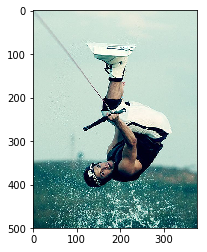

In [116]:
# choose random image
im_keys = list(cap_lval.keys())
ran_key = im_keys[random.choice(range(len(im_keys)))]
caps = cap_lval[ran_key]
img = plt.imread(os.path.join(F30_IM_DIR, ran_key))
plt.imshow(img)
print(caps)

In [117]:
# save to pickles
if not os.path.exists('./pickles'):
    os.mkdir('./pickles')

In [118]:
# labelled + unlabelled captions
with open('./pickles/captions_tr.pkl', 'wb') as wf:
    pickle.dump(file=wf, obj=cap_dict)

In [119]:
# only labelled
with open('./pickles/captions_ltr.pkl', 'wb') as wf:
    pickle.dump(file=wf, obj=cap_dict_l)

In [120]:
# labelled val captions
with open('./pickles/captions_val.pkl', 'wb') as wf:
    pickle.dump(file=wf, obj=cap_lval)

In [121]:
# labelled test captions
with open('./pickles/captions_test.pkl', 'wb') as wf:
    pickle.dump(file=wf, obj=cap_ltest)

In [122]:
# dataset overview
print("Training set size: {}\nLabelled Training set size: {}\nValidation set size: {}\nTest set size: {}".format(
    len(cap_dict.keys()), len(cap_dict_l.keys()),len(cap_lval.keys()), len(cap_ltest.keys())))

Training set size: 30383
Labelled Training set size: 5600
Validation set size: 1400
Test set size: 0


In [123]:
# TODO: create 3 evaluation files for futher usage
# format: {'caption': 'A bicycle replica with a clock as the front wheel.',
#  'id': 37,
#  'image_id': 203564}
# use json dump for list of dictionaries

In [124]:
def prepare_eval(caption_dict, label):
    # annotations
    eval_d_list = []
    img_info = []
    for imid in caption_dict.keys():
        ev_dict = {'image_id': int(imid.split('.')[0]),
                   'caption': ' '.join(caption_dict[imid][label][0][1:-1]),
                   'id': int(imid.split('.')[0])}
        im_dict = {'id' : int(imid.split('.')[0]),
                   'file_name': imid}
        eval_d_list.append(ev_dict)
        img_info.append(im_dict)
    return {'annotations': eval_d_list, 'images': img_info}

In [125]:
import json

In [126]:
if not os.path.exists('./annotations'):
    os.makedirs('./annotations')

In [127]:
def dump_to_json(obj, f_name):
    with open('./annotations/' + f_name, 'w') as wf:
        json.dump(obj, wf)

In [128]:
! rm ./annotations/*

In [129]:
# val
dump_to_json(prepare_eval(cap_lval, 'actual'), 'val_act.json')
dump_to_json(prepare_eval(cap_lval, 'romantic'), 'val_rom.json')
dump_to_json(prepare_eval(cap_lval, 'humorous'), 'val_hum.json')

In [130]:
# test
dump_to_json(prepare_eval(cap_ltest, 'actual'), 'test_act.json')
dump_to_json(prepare_eval(cap_ltest, 'romantic'), 'test_rom.json')
dump_to_json(prepare_eval(cap_ltest, 'humorous'), 'test_hum.json')

In [131]:
! ls ./annotations/

test_act.json  test_rom.json  val_hum.json
test_hum.json  val_act.json   val_rom.json
